# Natural computing - Assignment 1
#### Jelle Arts (s1010317), Ruben Geurtjens (s1006223), Lotte Willems (s1009251)

### Question 1

Using slide 43 from the lecture, we can see that schemas with a low order are more likely to survive. Therefore, schema A1 is more likely to survive. 

$S_m(A1) = (1-0.01)^4=0.961 $ and $S_m(A2) = (1-0.01)^6=0.941$


### Question 2

The needle in the hay-stack problem that was described in the lecture is a problem where the Building Block Hypothesis does not hold. In the hay-stack problem, single positions do not provide any information for guiding the GA to the global optimum.

### Question 3

Fitness total = $2^2+3^2+4^2=29$

Fitness $ (x = 2) = 4/29=0.138$

Fitness $(x = 3) = 9/29=0.310$

Fitness $(x = 4) = 16/29=0.551$

If we scale the function to $f_1(x) = f(x) + 20$ we get the following probabilities. 

Fitness total = $2^2+20+3^2+20+4^2+20=89$

Fitness $ (x = 2) = 24/89=0.270$ 
Fitness $ (x = 3) = 29/89=0.326$ 
Fitness $ (x = 4) = 36/89=0.404$ 

We can see from this that the second fitness functions yield a lower selection pressure. This is because the probability of surviving are more evenly distributed when compared to the other fitness function. Based on this, we can conclude that fitness scaling is an easy and effective measure to control the selection pressure. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import operator
import random

from IPython.display import clear_output
from deap import gp, base, creator, tools, algorithms

### Question 4

Below you can find the code for the simple (1 + 1) - GA. The answers for subquestions a, b and c are also below.

In [83]:
def GA(l = 100, n = 1500, c_prime = True):
    fitness = []
    p = 1/l
    
    x = np.random.randint(2, size=(l,))
    
    for i in range(n):
        x_copy = x.copy()
        x_m = []
        for a in x_copy:
            if np.random.uniform() < p:
                if a==0:
                    x_m.append(1)
                else:
                    x_m.append(0)
            else:
                x_m.append(a)
        x_m = np.asarray(x_m)
        if sum(x) < sum(x_m) and not c_prime:
            x = x_m
        elif c_prime:
            x=x_m
        fitness.append(sum(x))
    return fitness

In [3]:
fitness = GA(100, n=1500, c_prime=False)

a) The plot for the fitness plotted agains the iterations can be found below

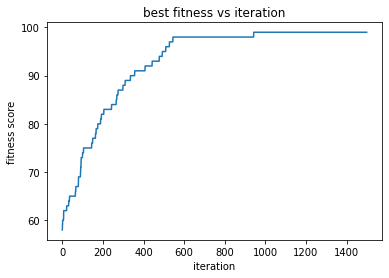

In [4]:
plt.plot(fitness)
plt.title("best fitness vs iteration")
plt.ylabel("fitness score")
plt.xlabel("iteration")
plt.show()

b) With 10 runs, the algorithm finds the optimum almost every time. In the run below, it found the optimum all times. However, when running it 10 times a couple of times again, there is a run of 9/10 times finding the global optimum sometimes.

In [5]:
for x in range(10):
    fitness = GA(100,n=1500, c_prime=False)   
    print(fitness[-1])

100
100
100
100
100
100
100
100
100
100


c) When replacing c with c' in the algorithm, the performance decreases as can be seen below. The algorithm never converges and usually gets stuck at a fitness score of around 50, which makes sense. If we take a random bit string of length 100, we will get 50 ones and 50 zeros on average.  

In [6]:
for x in range(10):
    fitness = GA(100, n=1500, c_prime=True)   
    print(fitness[-1])

46
50
50
43
50
51
53
56
50
51


### Question 5

A (1 + 5) ES differs from (1 + 1) in exploring the search space in that (1 + 5) looks at more local options compared to (1 + 1). So with (1 + 5) you are exploring more of the search space each step.

For the (1 + $\lambda$) ES, the smaller the $\lambda$, the more the behaviour matches a greedy algorithm. 

### Question 6

Below you can find the code for the simple EA for the TSP. The algorithm was ran with and without local search.

From the plots you can see that the memetic algorithm with local search is more efficient than the simple ES on the traveling salesmen problem. The algorithm needs less iterations to converge towards a minimal fitness. However, the local search is less time efficient per generation. 

In [5]:
# creating data 
n = 50
cities = []
for i in range(n):
    cities.append(np.random.randint(5, 100, size = 2))

In [6]:
def create_pop(n_population, n_cities):
    population = []
    for i in range(n_population):
        population.append(np.random.permutation(n_cities))
    return population

In [7]:
def euclidean(pos1,pos2):
    return np.sqrt(abs(pos1[0] - pos2[0])**2 + abs(pos1[1] - pos2[1])**2)
    

In [8]:
def fitness(ind, cities):
    total = 0 
    for i, x in enumerate(ind[:len(ind) - 1]):
        total += euclidean(cities[x], cities[ind[i + 1]])
    return total

In [9]:
def select_parents(population, cities):
    total_fitness = sum([fitness(x, cities) for x in population])
    repro_prob = [(fitness(x, cities) / total_fitness) for x in population]
    repro_prob = np.reciprocal(repro_prob)
    repro_prob = repro_prob / sum(repro_prob)
    ind_parents = np.random.choice(np.arange(len(population)), size = len(population), p = repro_prob)
    parents = [population[parent] for parent in ind_parents]
    return parents

In [10]:
def cross_over(parent1, parent2):
    cut = np.random.randint(0,len(parent1), size=2)
    cut = np.sort(cut)
    offspring1 = parent1.copy()
    offspring2 = parent2.copy()
    for i in range(1, len(parent2)-cut[1]):
        for j in range(1,len(parent2)):
            if parent2[(cut[1]+j) % (len(parent2))] not in offspring1[cut[0]:cut[1]+i]:
                offspring1[cut[1]+i] = parent2[(cut[1]+j) % (len(parent2))]  
                break
    
    for i in range(cut[0]):
        for j in range(len(parent2)):
            if parent2[j] not in offspring1[cut[0]:] and parent2[j] not in offspring1[0:i]:
                offspring1[i] = parent2[j]
                break
                
    for i in range(1, len(parent1) - cut[1]):
        for j in range(1,len(parent1)):
            if parent1[(cut[1]+j) % (len(parent1))] not in offspring2[cut[0]:cut[1]+i]:
                offspring2[cut[1]+i] = parent1[(cut[1]+j) % (len(parent1))]  
                break
    
    for i in range(cut[0]):
        for j in range(len(parent1)):
            if parent1[j] not in offspring2[cut[0]:] and parent1[j] not in offspring2[0:i]:
                offspring2[i] = parent1[j]
                break
                
    return offspring1, offspring2

In [11]:
def mutation(parent):
    swap1 = np.random.randint(0, len(parent))
    swap2 = np.random.randint(0, len(parent))
      
    parent[swap1], parent[swap2] = parent[swap2], parent[swap1] 
    
    return parent

In [12]:
def local_search(initial_state, cities):
    """ Peforms local search to find a better solution """
    initial_temp = 20
    final_temp = 10
    alpha = 1
    
    current_temp = initial_temp

    solution = initial_state

    while current_temp > final_temp:
        neighbor = mutation(solution.copy())

        cost_diff = fitness(initial_state, cities) - fitness(neighbor, cities)
        
        if cost_diff > 0:
            solution = neighbor
            
        current_temp -= alpha
    
    return solution

In [13]:
def run_memetic_tsp(n, cities, max_iter = 100, ls = True):

    ### population needs an even number of parents
    population = create_pop(n, len(cities))
    
    # if local search is true, run simulated annealing
    if ls:
        population = [local_search(ind, cities) for ind in population] 

    n_iter = 0
    av_fitness = []
    min_fitness = []
        
    while(n_iter < max_iter):
        parents = select_parents(population, cities)
        
        new_population = parents.copy()
        
        while(parents):
            parent1 = parents.pop()
            parent2 = parents.pop()
            offspring1, offspring2 = cross_over(parent1, parent2)
            new_population.extend([offspring1, offspring2])

        mutations = [mutation(x) for x in new_population]
        
        if ls:
            mutations = [local_search(ind, cities) for ind in mutations] 

        mutations.sort(key = lambda x : fitness(x, cities))

        population = mutations[0:n]
        
        min_fitness.append(np.min([fitness(x, cities) for x in population]))
        av_fitness.append(np.average([fitness(x, cities) for x in population]))
        
        n_iter += 1
        print(n_iter, "/", max_iter)
        clear_output(wait=True)
    
    return av_fitness, min_fitness, parents

#### Without local search

In [14]:
av_fitness, min_fitness, parents = run_memetic_tsp(100, cities, ls = False)

100 / 100


#### With local search

In [16]:
av_fitness_sa, min_fitness_sa, parents_sa = run_memetic_tsp(100, cities)

100 / 100


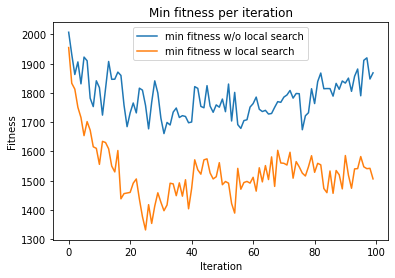

In [17]:
plt.plot(min_fitness)
plt.plot(min_fitness_sa)
plt.legend(["min fitness w/o local search", "min fitness w local search"])
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.title("Min fitness per iteration")
plt.show()

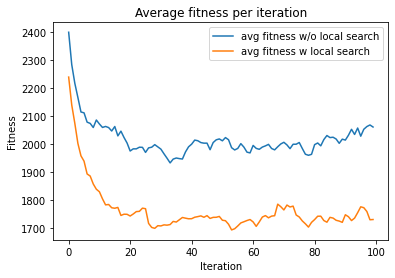

In [18]:
plt.plot(av_fitness)
plt.plot(av_fitness_sa)
plt.legend(["avg fitness w/o local search", "avg fitness w local search"])
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.title("Average fitness per iteration")
plt.show()

### Question 7

a) 

Function set: $\{\land, \lor, \leftrightarrow, \rightarrow\}$

Terminal set: $\{x, y, z, true\}$

S-expression: $(\rightarrow (\land \; y \; true)(\lor \; (\lor \; x \; y) (\leftrightarrow \; z \; (\land \; x \; y))))$

b)

Function set: $\{*, +, -\}$

Terminal set: $\{0.234, 0.789, x, z\}$

S-expression: $(+ \; (* \; 0.234 \; z)(- \; x \; 0.789))$

### Question 8

The code for the genetic program to find a symbolic expression can be found below. Both plots of the best generation fitness and the best generation size can be found at the bottom of the code. 

We also plotted the function against the input.

Some undesirable phenomenon that we found from the data and the plots is that is sometimes gets stuck at a certain fitness. We think this might be due to the algorithm getting stuck in a local optima and it not being able to get out of it.

In [53]:
X_input = [-1., -.9, -.8, -.7, -.6, -.5, -.4, -.3, -.2, -.1, .0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]
y_output = [.0, -.1629, -.2624, -.3129, -.3264, -.3125, -.2784, -.2289, -.1664, -.0909, .0, .1111, .2496, .4251, .6496, .9375, 1.3056, 1.7731, 2.3616, 3.0951, 4.0000]

#### Creating (custom) operators

In [41]:
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1
    
def protectedLog(x):
    try:
        return math.log(x)
    except ValueError:
        return 1

#### Creating set of operators

In [42]:
pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(protectedLog, 1)
pset.addPrimitive(math.exp, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)

pset.renameArguments(ARG0 = 'x')

#### Creating the toolbox

In [43]:
creator.create("FitnessMin", base.Fitness, weights = (-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_ = 1, max_ = 2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def sum_of_abs_errors(individual, points):
    func = toolbox.compile(expr = individual)
    errors = (np.abs(func(x) - y_output[idx]) for idx, x in enumerate(points))
    return np.sum(errors),

toolbox.register("evaluate", sum_of_abs_errors, points = X_input)
toolbox.register("select", tools.selTournament, tournsize = 3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_ = 0, max_ = 2)
toolbox.register("mutate", gp.mutUniform, expr = toolbox.expr_mut, pset = pset)

#### Setting up statistics and running the algorithm

In [44]:
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness = stats_fit, size = stats_size)
mstats.register("min", np.min)

In [45]:
pop = toolbox.population(n = 1000)
hof = tools.HallOfFame(1)
pop, log = algorithms.eaSimple(pop, toolbox, 0.7, 0.0, 50, stats = mstats,
                                   halloffame = hof, verbose = True)

<ipython-input-43-9e1cb2bf0cd1>:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(errors),


   	      	       fitness        	         size         
   	      	----------------------	----------------------
gen	nevals	gen	min    	nevals	gen	min	nevals
0  	1000  	0  	5.45326	1000  	0  	2  	1000  
1  	702   	1  	4.24698	702   	1  	2  	702   
2  	728   	2  	4.24698	728   	2  	2  	728   
3  	712   	3  	4.24698	712   	3  	2  	712   
4  	686   	4  	4.24698	686   	4  	2  	686   
5  	706   	5  	2.3637 	706   	5  	2  	706   
6  	718   	6  	4.24698	718   	6  	2  	718   
7  	714   	7  	4.24698	714   	7  	2  	714   
8  	712   	8  	4.24698	712   	8  	2  	712   
9  	680   	9  	4.21783	680   	9  	3  	680   
10 	704   	10 	4.21783	704   	10 	3  	704   
11 	682   	11 	4.21783	682   	11 	3  	682   
12 	694   	12 	4.21783	694   	12 	3  	694   
13 	686   	13 	4.21783	686   	13 	3  	686   
14 	702   	14 	4.21783	702   	14 	3  	702   
15 	660   	15 	4.21783	660   	15 	3  	660   
16 	700   	16 	4.21783	700   	16 	3  	700   
17 	686   	17 	4.21783	686   	17 	3  	686   
18 	698   	18 	4.21783	698   	1

#### Printing the final expression and its plot

In [27]:
print(hof[0])

add(x, mul(x, add(x, mul(x, add(mul(x, x), x)))))


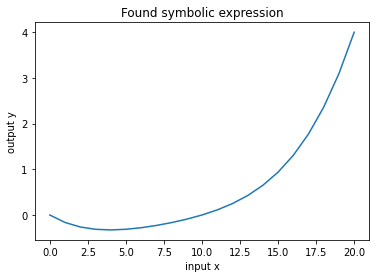

[0.0, -0.16289999999999993, -0.26239999999999986, -0.3129, -0.3264, -0.3125, -0.2784, -0.2289, -0.1664, -0.09090000000000001, 0.0, 0.1111, 0.24960000000000002, 0.4251, 0.6496000000000001, 0.9375, 1.3055999999999999, 1.7731, 2.3616, 3.0951, 4.0]


In [46]:
y = []
for x in X_input:
    y.append(x + (x * (x + (x * (x + (x * x))))))

plt.plot(y)
plt.xlabel("input x")
plt.ylabel("output y")
plt.title("Found symbolic expression")
plt.show()
print(y)

In [47]:
size = log.chapters['size']

In [48]:
fitness = log.chapters['fitness']

In [49]:
fitnesses = []
for x in fitness:
    fitnesses.append(x['min'])

#### Plotting best fitness results

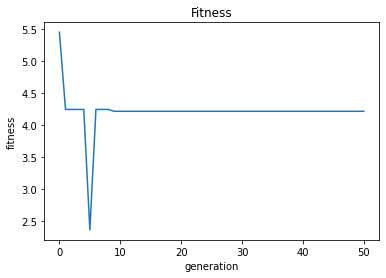

In [50]:
plt.plot(fitnesses)
plt.xlabel('generation')
plt.ylabel('fitness')
plt.title('Fitness')
plt.show()

In [51]:
sizes = []
for x in size:
    sizes.append(x['min'])

#### Plotting the best size

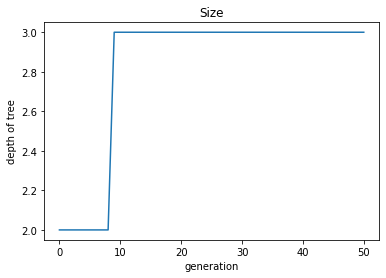

In [52]:
plt.plot(sizes)
plt.xlabel("generation")
plt.ylabel("depth of tree")
plt.title("Size")
plt.show()